## Time Series

Seattle Bicycle Counts: data comes from an automated bicycle counter, installed in late 2012 which has inductive sensors on the east and west sidewalks of the bridge. The hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the direct link to the dataset.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np

%matplotlib inline

In [5]:
data = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col = 'Date', parse_dates = True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [6]:
data.columns = ['Total', 'West', 'East']

In [8]:
data.dropna().describe()

,Total,West,East
count,139937.000000,139937.000000,139937.000000
mean,111.477401,50.784968,60.692433
std,142.423434,65.671518,88.573283
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,146.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


Text(0, 0.5, 'Hourly Bicycle Count')

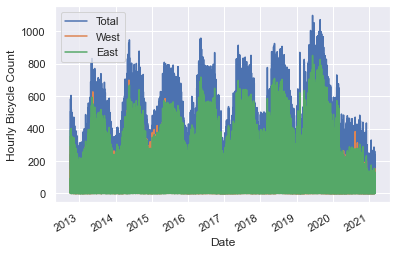

In [12]:
seaborn.set()
data.plot()
plt.ylabel('Hourly Bicycle Count')

The ~25,000 hourly samples are far too dense for us to make much sense of. We can gain more insight by resampling the data to a coarser grid. Let's resample by week:

Text(0, 0.5, 'Weekly bicycle count')

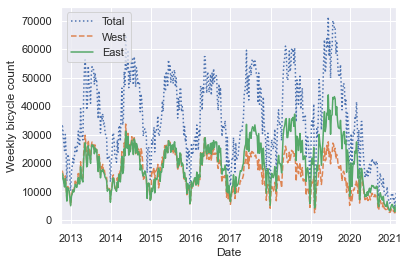

In [13]:
weekly = data.resample('W').sum()
weekly.plot(style = [':', '--', '-'])
plt.ylabel('Weekly bicycle count')

This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week (likely dependent on weather)

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the pd.rolling_mean() function. Here we'll do a 30 day rolling mean of our data, making sure to center the window:

Text(0, 0.5, 'Mean hourly count')

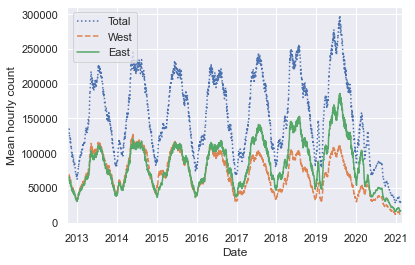

In [14]:
daily = data.resample('D').sum()
daily.rolling(30, center = True).sum().plot(style = [':', '--', '-'])
plt.ylabel('Mean hourly count')

<AxesSubplot:xlabel='Date'>

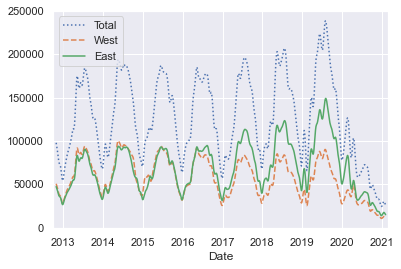

In [16]:
#get a smother version of a rolling mean using a window function
daily.rolling(50, center = True, win_type = 'gaussian').sum(std = 10).plot(style = [':', '--', '-'])

While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure. For example, we might want to look at the average traffic as a function of the time of day.

<AxesSubplot:xlabel='time'>

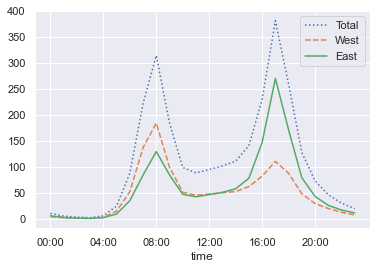

In [18]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4*60*60*np.arange(6)
by_time.plot(xticks = hourly_ticks, style = [':', '--', '-'])

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening. This is likely evidence of a strong component of commuter traffic crossing the bridge. This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

<AxesSubplot:>

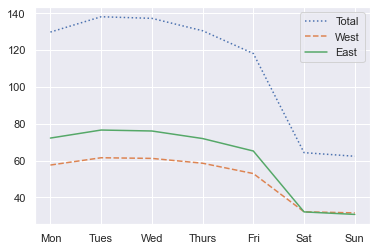

In [19]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])


This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

In [21]:
#hourly tren on weekdays vs weekends
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

<AxesSubplot:title={'center':'Weekends'}, xlabel='time'>

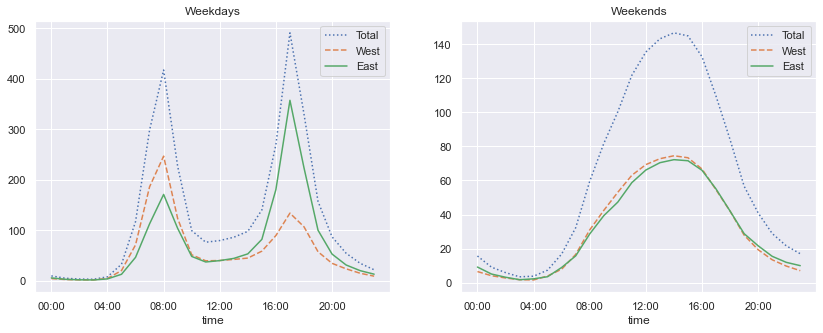

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5))
by_time.loc['Weekday'].plot(ax = ax[0], title = 'Weekdays', xticks = hourly_ticks, style = [':', '--', '-'])
by_time.loc['Weekend'].plot(ax = ax[1], title = 'Weekends', xticks = hourly_ticks, style = [':', '--', '-'])

We see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends